# Experiment data using Minitown and MiniCPS. Attack on PLC1
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is an attack on PLC1. In this attack, an attacker takes control of the PLC1. When the attack is active, a replay attack is launched. The replay attack is done with 100 measurements of the tank level. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data = pd.read_csv('no_minicps.csv')
demand_driven_no_attack = pd.read_csv('experiment_data/demand_driven/no_attack/physical_results.csv')
demand_driven_attack_plc1 = pd.read_csv('experiment_data/demand_driven/attack_plc1/physical_results.csv')

scada_demand_driven_no_attack = pd.read_csv('experiment_data/demand_driven/no_attack/scada_saved_tank_levels_received.csv')
scada_demand_driven_attack_plc1 = pd.read_csv('experiment_data/demand_driven/attack_plc1/scada_saved_tank_levels_received.csv')

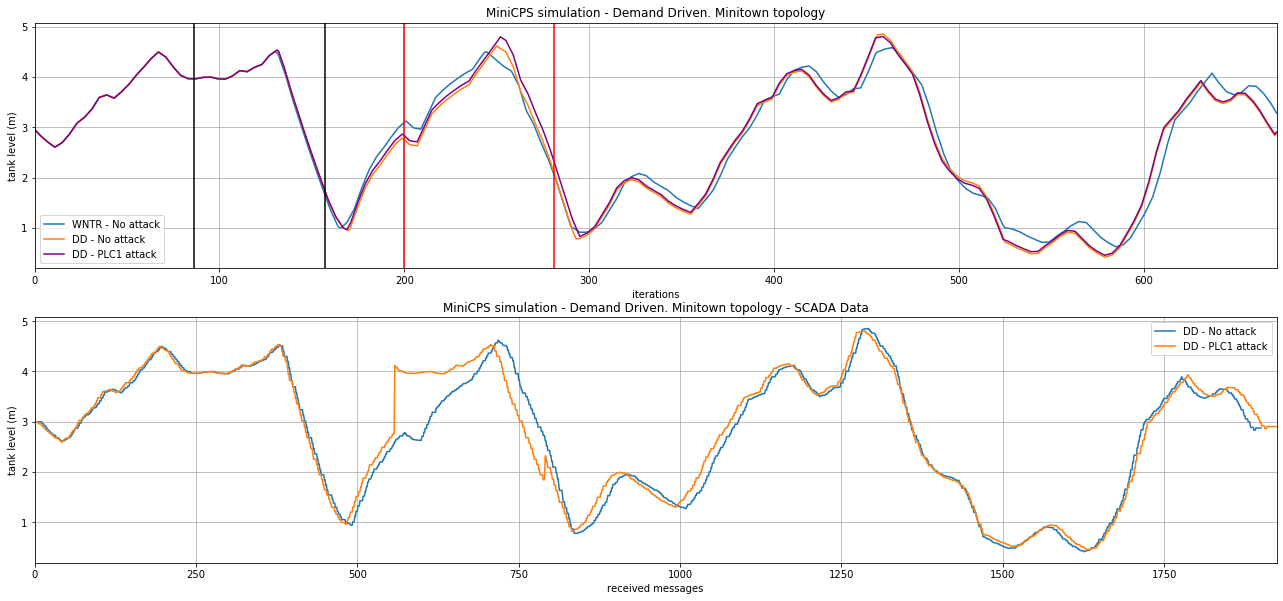

In [6]:
dd = plt.subplot(2,1,1)
no_minicps_data["PRESSURE_TANK"].plot(label='WNTR - No attack', ax=dd)
demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
demand_driven_attack_plc1["TANK_LEVEL"].plot(label='DD - PLC1 attack', ax=dd, color="Purple")
plt.axvline(x=86, color="black")
plt.axvline(x=157, color="black")
plt.axvline(x=200, color="red")
plt.axvline(x=281, color="red")
plt.title("MiniCPS simulation - Demand Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
scada_demand_driven_attack_plc1["TANK_LEVEL"].plot(label='DD - PLC1 attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)



In the figure above, the time between the black horizontal lines represents the attacker saving mesaurements to be replayed in the time between the red lines

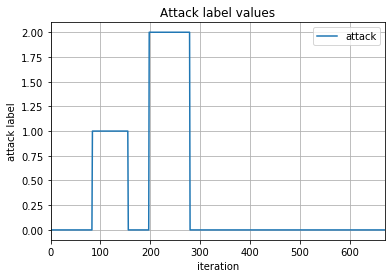

In [13]:
demand_driven_attack_plc1['Attack#01'].plot()

plt.legend(['attack','no attack'])
plt.title('Attack label values')
ax = plt.gca()
ax.set_xlabel("iteration")
ax.set_ylabel("attack label")
plt.grid(True)

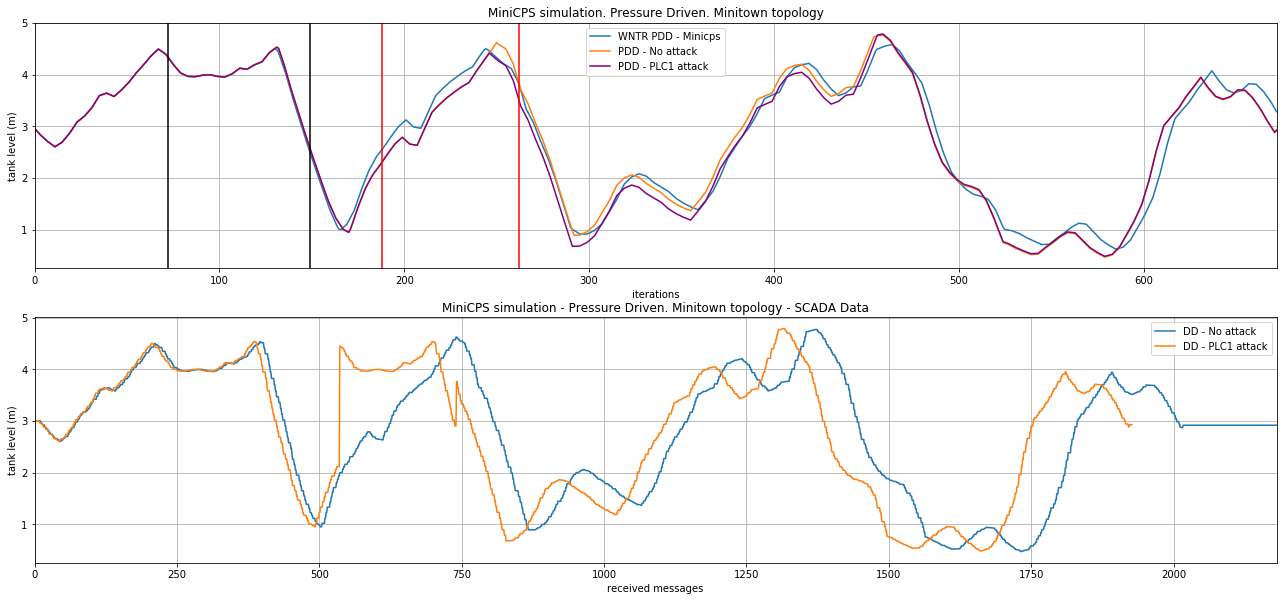

In [8]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data_pdd = pd.read_csv('no_minicps_pdd.csv')
pressure_driven_no_attack = pd.read_csv('experiment_data/pressure_driven/no_attack/physical_results.csv')
pressure_driven_attack_plc1 = pd.read_csv('experiment_data/pressure_driven/attack_plc1/physical_results.csv')

scada_pressure_driven_no_attack = pd.read_csv('experiment_data/pressure_driven/no_attack/scada_saved_tank_levels_received.csv')
scada_pressure_driven_attack_plc1 = pd.read_csv('experiment_data/pressure_driven/attack_plc1/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["PRESSURE_TANK"].plot(label='WNTR PDD - Minicps', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
pressure_driven_attack_plc1["TANK_LEVEL"].plot(label='PDD - PLC1 attack', ax=dd, color="purple")

plt.axvline(x=72, color="black")
plt.axvline(x=149, color="black")
plt.axvline(x=188, color="red")
plt.axvline(x=262, color="red")
plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_pressure_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
scada_pressure_driven_attack_plc1["TANK_LEVEL"].plot(label='DD - PLC1 attack', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


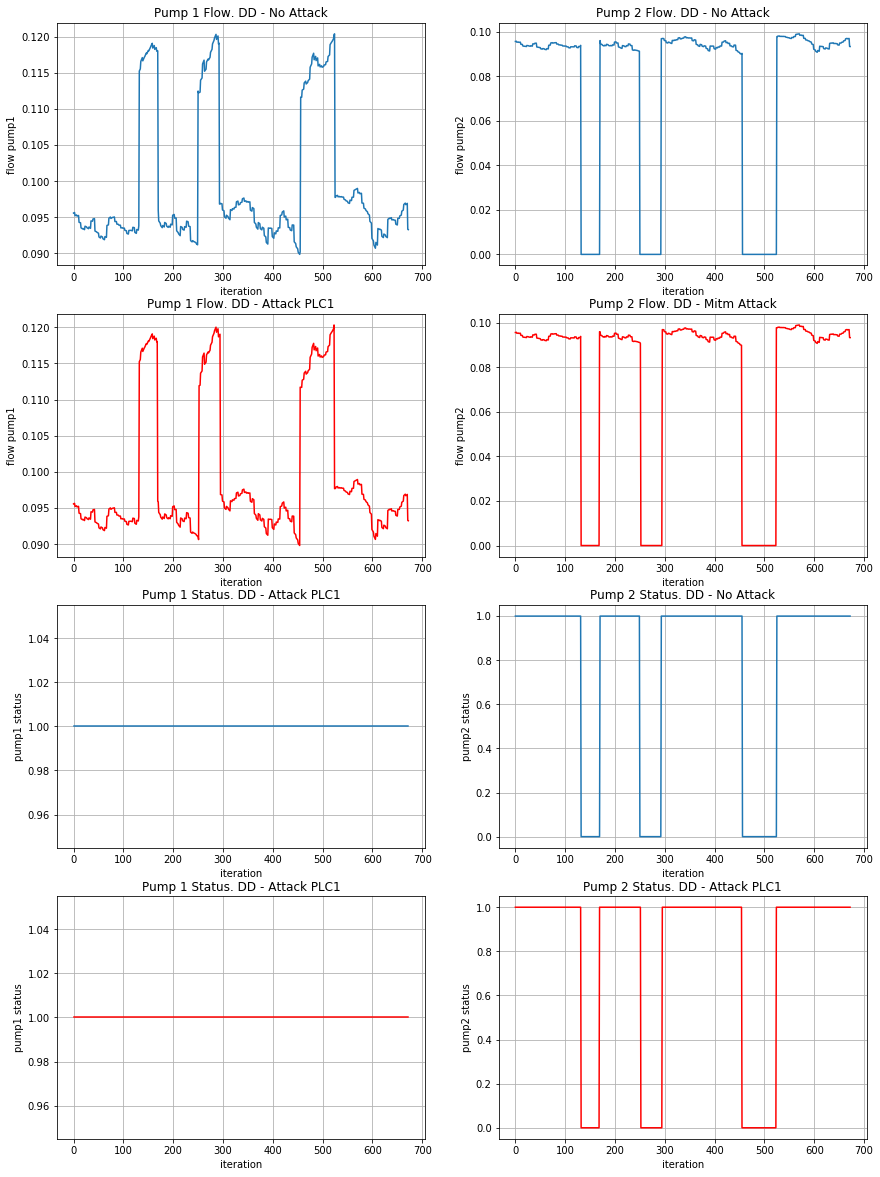

In [30]:
fp1 = demand_driven_no_attack['FLOW_PUMP1']
fp2 = demand_driven_no_attack['FLOW_PUMP2']
sp1 = demand_driven_no_attack['STATUS_PUMP1']
sp2 = demand_driven_no_attack['STATUS_PUMP2']

fp1_attack = demand_driven_attack_plc1['FLOW_PUMP1']
fp2_attack = demand_driven_attack_plc1['FLOW_PUMP2']
sp1_attack = demand_driven_attack_plc1['STATUS_PUMP1']
sp2_attack = demand_driven_attack_plc1['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. DD - Attack PLC1')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. DD - Attack PLC1')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - Attack PLC1')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. DD - Attack PLC1')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. DD - Attack PLC1')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()